## Reading movie metadata

In [2]:
import pandas as pd
import numpy as np

metadata = pd.read_table("MovieSummaries/MovieSummaries/movie.metadata.tsv", header=None)

metadata.columns = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countxries",  
    "Movie_genres"     
]

metadata

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countxries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Checking types and Nans

In [3]:
metadata.isna().sum()

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           6902
Movie_box_office_revenue    73340
Movie_runtime               20450
Movie_languages                 0
Movie_countxries                0
Movie_genres                    0
dtype: int64

In [4]:
metadata.dtypes

Wikipedia_movie_ID            int64
Freebase_movie_ID            object
Movie_name                   object
Movie_release_date           object
Movie_box_office_revenue    float64
Movie_runtime               float64
Movie_languages              object
Movie_countxries             object
Movie_genres                 object
dtype: object

## Loading summaries

In [5]:
with open("MovieSummaries/MovieSummaries/plot_summaries.txt", "r", encoding="utf-8") as f:
    file = f.readlines()

data = [line.strip().split("\t", 1) for line in file]

summaries_df = pd.DataFrame(data, columns=["Wikipedia_movie_ID", "Movie_Summary"])

summaries_df['Wikipedia_movie_ID'] = summaries_df['Wikipedia_movie_ID'].astype("int")

In [6]:
summaries_df.isna().sum()

Wikipedia_movie_ID    0
Movie_Summary         0
dtype: int64

## Merging datasets

In [7]:
final_df = metadata.merge(summaries_df, on="Wikipedia_movie_ID") 

In [8]:
final_df.isna().sum()

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           2618
Movie_box_office_revenue    34619
Movie_runtime                6624
Movie_languages                 0
Movie_countxries                0
Movie_genres                    0
Movie_Summary                   0
dtype: int64

In [9]:
final_df["Movie_box_office_revenue"]

0        14010832.0
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
42202           NaN
42203           NaN
42204           NaN
42205           NaN
42206           NaN
Name: Movie_box_office_revenue, Length: 42207, dtype: float64

In [10]:
pd.DataFrame(np.unique(final_df.Movie_genres))               

,0
0,"{""/m/014dsx"": ""Travel"", ""/m/01z4y"": ""Comedy""}"
1,"{""/m/014dsx"": ""Travel"", ""/m/0219x_"": ""Indie"", ..."
2,"{""/m/014dsx"": ""Travel"", ""/m/0hj3n89"": ""Instrum..."
3,"{""/m/014dsx"": ""Travel"", ""/m/0jtdp"": ""Documenta..."
4,"{""/m/01585b"": ""Slasher""}"
...,...
17848,"{""/m/0vjs6"": ""Detective"", ""/m/03btsm8"": ""Actio..."
17849,"{""/m/0vjs6"": ""Detective"", ""/m/03k9fj"": ""Advent..."
17850,"{""/m/0vjs6"": ""Detective"", ""/m/04pbhw"": ""Superh..."
17851,"{""/m/0vjs6"": ""Detective"", ""/m/082gq"": ""War film""}"


## Processing movie genres

In [11]:
import json

final_df["Movie_genres"] = final_df["Movie_genres"].apply(lambda x: list(json.loads(x).values()))

## Now we look for keywords

In [44]:
# keywords = ["Biodiversity", "CO2", "Global Warming", "Climate Change", "biodiversity"]
keywords_raw = [
    "Abiotic",
    "Absorption of radiation",
    "Acid deposition",
    "Acid rain",
    "Acid solution",
    "Acidic",
    "Adiabatic process",
    "Aerosol",
    "Afforestation",
    "Air carrier",
    "Air pollutant",
    "Air pollution",
    "Albedo",
    "Alkalinity",
    "Alternative energy",
    "Anaerobic",
    "Anaerobic decomposition",
    "Anaerobic lagoon",
    "Anaerobic organism",
    "Antarctic",
    "Ozone Hole",
    "Anthracite",
    "Anthropogenic",
    "Arable land",
    "Aromatic",
    "Ash",
    "Asphalt",
    "Atmosphere",
    "Atmospheric lifetime",
    "Atomic weight",
    "Atoms",
    "Aviation Gasoline",
    "Bacteria",
    "Barrel",
    "Basic solution",
    "Biodegradable",
    "Biofuel",
    "Biogeochemical cycle",
    "Biological oxygen demand",
    "Biomass",
    "Biomass energy",
    "Biosphere",
    "Biotic",
    "Bitumen",
    "Bituminous coal",
    "BOD5",
    "British thermal unit",
    "Bunker fuel",
    "Capacity Factor",
    "Carbon black",
    "Carbon cycle",
    "Carbon dioxide",
    "Carbon equivalent",
    "Carbon flux",
    "Carbon intensity",
    "Carbon pool",
    "Carbon sequestration",
    "Carbon sinks",
    "Carbon tetrachloride",
    "Chemical reaction",
    "Chlorofluorocarbons",
    "Climate feedback",
    "Climate lag",
    "Climate sensitivity",
    "Climate system (or Earth system)",
    "Coal",
    "Coal coke",
    "Coal gasification",
    "Coal liquefaction",
    "Coalbed methane",
    "Co-control benefit",
    "Cogeneration",
    "Combustion",
    "Compost",
    "Composting",
    "Compound",
    "Concentration",
    "Conifer",
    "Coniferous trees",
    "Cooling Degree Days",
    "Crop residue",
    "Crop rotation",
    "Crude oil",
    "Deciduous trees",
    "Decomposition",
    "Deforestation",
    "Degradable",
    "Distillate fuel oil",
    "Economy",
    "Ecosystem",
    "Element",
    "Emissions factor",
    "Emissions coefficient",
    "Emissions",
    "Energy conservation",
    "Energy intensity",
    "Energy quality",
    "Energy",
    "Energy-efficiency",
    "Enhanced greenhouse effect",
    "Enhanced oil recovery",
    "Enteric fermentation",
    "Environment",
    "Ethanol",
    "Evapotranspiration",
    "Feedlot",
    "Fertilization, carbon dioxide",
    "Fertilizer",
    "Flaring",
    "Fluidized bed combustion",
    "Fluorocarbons",
    "Forcing mechanism",
    "Fossil fuel",
    "Fossil fuel combustion",
    "Freon",
    "Fugitive emissions",
    "Gasohol",
    "Geosphere",
    "Geothermal energy",
    "Global Warming Potential",
    "Global warming",
    "Grassland",
    "Greenhouse effect",
    "Greenhouse gas",
    "Halocarbons",
    "Halons",
    "Heat",
    "Heat content",
    "Higher heating value",
    "Histosol",
    "Hydrocarbons",
    "Hydrochlorofluorocarbons",
    "Hydroelectric power plant",
    "Hydrofluorocarbons",
    "Hydropower",
    "Infrared radiation",
    "Inorganic compound",
    "Inorganic fertilizer",
    "Jet fuel",
    "Joule",
    "Kerogen",
    "Kerosene",
    "Landfill",
    "Lifetime",
    "Light-duty vehicles",
    "Lignite",
    "Liquefied natural gas",
    "Liquefied petroleum gas",
    "Litter",
    "Lower heating value",
    "Lubricant",
    "Manure",
    "Mass balance",
    "Methane",
    "Methanol",
    "Methanotrophic",
    "Metric ton",
    "Mineral",
    "Molecule",
    "Montreal Protocol on Substances that Deplete the Ozone Layer",
    "Motor gasoline",
    "Municipal solid waste",
    "Naphtha",
    "Natural gas",
    "Natural gas liquids",
    "Nitrogen cycle",
    "Nitrogen fixation",
    "Nitrogen oxides ",
    "Nitrous oxide ",
    "Nonbiodegradable",
    "Nonlinearities",
    "Non-methane volatile organic compounds",
    "Non-point source",
    "Oil shale",
    "Oil",
    "Ore",
    "Organic compound",
    "Organic fertilizer",
    "Oxidize",
    "Oxygen cycle",
    "Ozone",
    "Ozone Depleting Substance",
    "Ozone layer",
    "Ozone precursors",
     "Particulate matter",
    "Particulates",
    "Parts per billion",
    "Parts per million",
    "Pentanes plus",
    "Perfluorocarbons",
    "Petrochemical feedstock",
    "Petrochemicals",
    "Petroleum coke",
    "Petroleum",
    "Photosynthesis",
    "Photovoltaic and solar thermal energy",
    "Point source",
    "Polyvinyl chloride",
    "Population",
    "Prescribed burning",
    "Primary oil recovery",
    "Radiation",
    "Radiative forcing",
    "Rail",
    "Rangeland",
    "Recycling",
    "Renewable energy",
    "Residence time",
    "Residual fuel oil",
    "Secondary oil recovery",
    "Sector",
    "Septic tank",
    "Sewage treatment",
    "Shale oil",
    "Short ton",
    "Sink",
    "Sludge",
    "Soil",
    "Soil carbon",
    "Solar energy",
    "Solar radiation",
    "Source",
    "Special naphtha",
    "Still gas",
    "Stratosphere",
    "Strip mining",
    "Subbituminous coal",
    "Sulfur cycle",
    "Sulfur dioxide",
    "Sulfur hexafluoride",
    "Surface mining",
    "Synthetic fertilizer",
    "Synthetic natural gas",
    "Tailings",
    "Tar sand",
    "Temperature",
    "Terrestrial",
    "Terrestrial radiation",
    "Trace gas",
    "Troposphere",
    "Tropospheric ozone precursor",
    "Tropospheric ozone",
    "Ultraviolet radiation",
    "Unfinished oils",
    "Volatile organic compounds",
    "Wastewater",
    "Water",
    "Water vapor",
    "Waxes",
    "Wetland",
    "Wetlands",
    "Wood energy"

]

keywords = []

for key in keywords_raw:
    keywords.append(" " + key + " ")
    keywords.append(" " + key + ",")
    keywords.append(" " + key + ".")
    keywords.append(" " + key + ";")
    keywords.append(" " + key + "?")
    keywords.append(" " + key + "!")

# Equality keywords
# keywords = [
#     "equality", "progressive", 
#     "taxation", "social", "fairness", "equity", "redistribution", 
#      "socialism", "tax", 
#     "welfare", "healthcare", 
#     "reform", "poverty", "inclusive", 
#     "egalitarianism", "community", "support", "collectivism"
# ]



pattern = '|'.join(keywords)  

filtered_df = final_df[final_df['Movie_Summary'].str.contains(pattern, na=False, case=False)]

filtered_df["Movie_genres"]

0        [Thriller, Science Fiction, Horror, Adventure,...
1        [Thriller, Erotic thriller, Psychological thri...
3          [Family Film, Fantasy, Adventure, World cinema]
4        [Romantic comedy, Ensemble Film, Comedy-drama,...
5        [Costume drama, War film, Epic, Period piece, ...
                               ...                        
42199                                             [Horror]
42200                       [Drama, Action, Crime, Comedy]
42202      [Crime Fiction, Thriller, Comedy, Supernatural]
42203                                              [Drama]
42205    [Science Fiction, Japanese Movies, Adventure, ...
Name: Movie_genres, Length: 34803, dtype: object

In [43]:

# Initialize dictionary to store keyword counts
keyword_counts = {keyword: 0 for keyword in keywords}

# Count occurrences of each keyword in `Movie_Summary`
for keyword in keywords:
    keyword_counts[keyword] = final_df['Movie_Summary'].str.contains(keyword, na=False, case=False).sum()

# Plot the keyword counts
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Keywords")
plt.ylabel("Movie Count")
plt.title("Movie Count per Equality-Related Keyword")
plt.show()

KeyboardInterrupt: 

In [45]:
# Initialize dictionary to store keyword counts
keyword_counts = {keyword: 0 for keyword in keywords}

# Count occurrences of each keyword in `Movie_Summary`
for keyword in keywords:
    keyword_counts[keyword] = final_df['Movie_Summary'].str.contains(keyword, na=False, case=False).sum()
keyword_counts = dict(sorted(keyword_movies.items(), key=lambda item: len(item[1]), reverse=True))



KeyboardInterrupt: 

In [ ]:
for key in keyword_counts:
    length = len(keyword_counts[key])
    print(key, length)

In [ ]:
# Dictionary to hold movie names for each keyword
keyword_movies = {}

for keyword in keywords:
    # Filter movies that contain the current keyword in their summary
    movies_with_keyword = final_df[final_df['Movie_Summary'].str.contains(keyword, na=False, case=False)]
    
    # Store the list of movie titles in the dictionary
    keyword_movies[keyword] = movies_with_keyword['Movie_name'].tolist()


In [ ]:
keyword_movies['Water']

In [ ]:
from collections import Counter
all_genres = [genre for sublist in filtered_df['Movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_counts

In [22]:
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

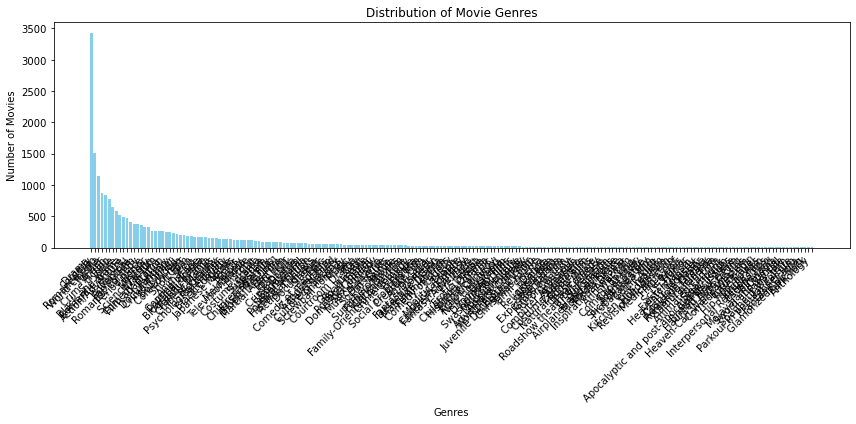

In [23]:
genre_counts_filtered = {genre: count for genre, count in genre_counts.items() if count >= 5}

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(genre_counts_filtered.keys(), genre_counts_filtered.values(), color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
filtered_df.shape

(42, 10)

In [17]:
from bs4 import BeautifulSoup
import requests
url = "https://unfccc.int/resource/cd_roms/na1/ghg_inventories/english/8_glossary/Glossary.htm"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    print(soup.prettify())

<html>
 <head>
  <meta content="noindex,nofollow" name="robots"/>
  <script src="/_Incapsula_Resource?SWJIYLWA=5074a744e2e3d891814e9a2dace20bd4,719d34d31c8e3a6e6fffd425f7e032f3">
  </script>
  <body>
  </body>
 </head>
</html>



In [18]:

from bs4 import BeautifulSoup

# Step 1: Fetch the webpage


# Check if the request was successful
if response.status_code == 200:
    # Step 2: Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Step 3: Extract the relevant information
    # For example, extracting all definitions in the glossary
    glossary_terms = soup.find_all('dt')  # Typically, glossary terms are in <dt> tags
    glossary_definitions = soup.find_all('dd')  # Definitions are usually in <dd> tags

    # Step 4: Combine the terms and definitions
    glossary = {}
    for term, definition in zip(glossary_terms, glossary_definitions):
        glossary[term.text.strip()] = definition.text.strip()

    # Print or process the glossary dictionary
    for term, definition in glossary.items():
        print(f"{term}: {definition}")

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
